<a href="https://colab.research.google.com/github/AndresMorones/Crystal-proyect/blob/main/Energy_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Andrés Morones
# Adrián Landaverde Nava
# Cristian Gonzaga López
# Joel Erick Martínez Espinosa

# 00. Introduction

In the R Shiny Dashboard made previously: (https://adrian-landaverde.shinyapps.io/CrystalCaseStudy/) we made the EDA. In which we could see how the energy from 2005 and 2006 is very different despite the variables are very alike. 

So it will be attempted to predict the energy using 2 approaches:
 
 In the fisrt one, it will be implemented one model for each year using the humidity and the temperature

 In the second one, it will be used a time series analysis to predict the energy based on the trend and seasonality of the data

#01. Libraries and Data

In [ ]:
!pip install statsmodels

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.pyplot import figure
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
import statistics
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_energy= pd.read_csv("/content/drive/MyDrive/Universidad/Cuarto Semestre/Crystal/energy__data-2.csv")
df_energy

,Hour,energy_consumpt_2005,energy_consumpt_2006,full_temp_2005,full_humid_2005,full_temp_2006,full_humid_2006
0,1,631.623161,1246.300847,-0.400000,64.000000,7.600000,82.000000
1,2,534.397104,1062.500558,-0.733333,65.333333,7.733333,78.666667
2,3,453.538785,884.586887,-1.066667,66.666667,7.866667,75.333333
3,4,400.699718,786.564121,-1.400000,68.000000,8.000000,72.000000
4,5,378.171092,742.669614,-1.666667,60.333333,8.333333,69.666667
...,...,...,...,...,...,...,...
8779,8780,950.369306,0.000000,3.333333,64.000000,NaN,NaN
8780,8781,880.138770,0.000000,2.666667,68.000000,NaN,NaN
8781,8782,792.754026,0.000000,2.000000,72.000000,NaN,NaN
8782,8783,740.446668,0.000000,1.333333,76.000000,NaN,NaN


In [ ]:
df_energy["Year"]=2005
df_energy["Day"]= (((df_energy["Hour"]-1)/24)+1).apply(np.floor)
df_energy["Week"]= (((df_energy["Day"]-1)/7)+1).apply(np.floor)
df_energy

,Hour,energy_consumpt_2005,energy_consumpt_2006,full_temp_2005,full_humid_2005,full_temp_2006,full_humid_2006,Year,Day,Week
0,1,631.623161,1246.300847,-0.400000,64.000000,7.600000,82.000000,2005,1.0,1.0
1,2,534.397104,1062.500558,-0.733333,65.333333,7.733333,78.666667,2005,1.0,1.0
2,3,453.538785,884.586887,-1.066667,66.666667,7.866667,75.333333,2005,1.0,1.0
3,4,400.699718,786.564121,-1.400000,68.000000,8.000000,72.000000,2005,1.0,1.0
4,5,378.171092,742.669614,-1.666667,60.333333,8.333333,69.666667,2005,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
8779,8780,950.369306,0.000000,3.333333,64.000000,NaN,NaN,2005,366.0,53.0
8780,8781,880.138770,0.000000,2.666667,68.000000,NaN,NaN,2005,366.0,53.0
8781,8782,792.754026,0.000000,2.000000,72.000000,NaN,NaN,2005,366.0,53.0
8782,8783,740.446668,0.000000,1.333333,76.000000,NaN,NaN,2005,366.0,53.0


In [ ]:
df_energy["Date"]=(np.asarray(df_energy['Year'], dtype='datetime64[Y]')-1970)+(np.asarray(df_energy['Day'], dtype='timedelta64[D]')-1)
df_energy["Month"]=pd.DatetimeIndex(df_energy['Date']).month
df_energy

,Hour,energy_consumpt_2005,energy_consumpt_2006,full_temp_2005,full_humid_2005,full_temp_2006,full_humid_2006,Year,Day,Week,Date,Month
0,1,631.623161,1246.300847,-0.400000,64.000000,7.600000,82.000000,2005,1.0,1.0,2005-01-01,1
1,2,534.397104,1062.500558,-0.733333,65.333333,7.733333,78.666667,2005,1.0,1.0,2005-01-01,1
2,3,453.538785,884.586887,-1.066667,66.666667,7.866667,75.333333,2005,1.0,1.0,2005-01-01,1
3,4,400.699718,786.564121,-1.400000,68.000000,8.000000,72.000000,2005,1.0,1.0,2005-01-01,1
4,5,378.171092,742.669614,-1.666667,60.333333,8.333333,69.666667,2005,1.0,1.0,2005-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,8780,950.369306,0.000000,3.333333,64.000000,NaN,NaN,2005,366.0,53.0,2006-01-01,1
8780,8781,880.138770,0.000000,2.666667,68.000000,NaN,NaN,2005,366.0,53.0,2006-01-01,1
8781,8782,792.754026,0.000000,2.000000,72.000000,NaN,NaN,2005,366.0,53.0,2006-01-01,1
8782,8783,740.446668,0.000000,1.333333,76.000000,NaN,NaN,2005,366.0,53.0,2006-01-01,1


In [ ]:
df_energy.isna().sum()

Hour                     0
energy_consumpt_2005    34
energy_consumpt_2006    42
full_temp_2005           0
full_humid_2005          0
full_temp_2006          24
full_humid_2006         24
Year                     0
Day                      0
Week                     0
Date                     0
Month                    0
dtype: int64

In [ ]:
df_energy["energy_consumpt_2005"].fillna(value=df_energy["energy_consumpt_2005"].mean(), inplace=True)
df_energy["energy_consumpt_2006"].fillna(value=df_energy["energy_consumpt_2006"].mean(), inplace=True)
df_energy=df_energy.iloc[:-24]
df_energy.isna().sum()

Hour                    0
energy_consumpt_2005    0
energy_consumpt_2006    0
full_temp_2005          0
full_humid_2005         0
full_temp_2006          0
full_humid_2006         0
Year                    0
Day                     0
Week                    0
Date                    0
Month                   0
dtype: int64

In [ ]:
variables=["energy_consumpt_2005","energy_consumpt_2006","full_temp_2005","full_temp_2006","full_humid_2005","full_humid_2006"]

# 02. Machine Learning Regression

Based on the dashboard plots, the energy is more correlated to the mean temperature per day, and to the humidity per hour

In [ ]:
meanEnergy2005= df_energy.groupby("Day")['full_temp_2005'].mean()
meanEnergy2006= df_energy.groupby("Day")['full_temp_2006'].mean()
df_energy["temp_per_day_2005"]=(np.repeat(meanEnergy2005,24)).values
df_energy["temp_per_day_2006"]=(np.repeat(meanEnergy2006,24)).values
df_energy["HourOfDay"]=df_energy["Hour"]-((df_energy['Day']-1)*24)
df_energy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Hour,energy_consumpt_2005,energy_consumpt_2006,full_temp_2005,full_humid_2005,full_temp_2006,full_humid_2006,Year,Day,Week,Date,Month,temp_per_day_2005,temp_per_day_2006,HourOfDay
0,1,631.623161,1246.300847,-0.400000,64.000000,7.600000,82.000000,2005,1.0,1.0,2005-01-01,1,3.133333,10.225,1.0
1,2,534.397104,1062.500558,-0.733333,65.333333,7.733333,78.666667,2005,1.0,1.0,2005-01-01,1,3.133333,10.225,2.0
2,3,453.538785,884.586887,-1.066667,66.666667,7.866667,75.333333,2005,1.0,1.0,2005-01-01,1,3.133333,10.225,3.0
3,4,400.699718,786.564121,-1.400000,68.000000,8.000000,72.000000,2005,1.0,1.0,2005-01-01,1,3.133333,10.225,4.0
4,5,378.171092,742.669614,-1.666667,60.333333,8.333333,69.666667,2005,1.0,1.0,2005-01-01,1,3.133333,10.225,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8756,927.986980,1933.241699,1.466667,43.333333,5.933333,62.000000,2005,365.0,53.0,2005-12-31,12,2.100000,4.775,20.0
8756,8757,909.729665,1763.838385,0.933333,46.666667,5.066667,67.000000,2005,365.0,53.0,2005-12-31,12,2.100000,4.775,21.0
8757,8758,848.714914,1569.071986,0.400000,50.000000,4.200000,72.000000,2005,365.0,53.0,2005-12-31,12,2.100000,4.775,22.0
8758,8759,740.913139,1468.273109,-0.066667,54.000000,3.333333,77.000000,2005,365.0,53.0,2005-12-31,12,2.100000,4.775,23.0


In [ ]:
def plotRgresion(y,y_predict,ax,limites,ymin,ymax):
  ax.plot(df_energy["Hour"],y,label="y Real",color="blue")
  ax.plot(df_energy["Hour"],y_predict,label="y Predicted",color="red")
  if(limites):
    ax.set_ylim(ymin,ymax)
  return(ax)

In [ ]:
X_2005= df_energy[['temp_per_day_2005','HourOfDay','full_humid_2005']]
y_2005= df_energy['energy_consumpt_2005']

X_train, X_test, y_train, y_test= train_test_split(X_2005,y_2005,random_state=21)

## 02.1 Random Forest

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...................n_estimators=10;, score=0.662 total time=   0.1s
[CV 2/5] END ...................n_estimators=10;, score=0.235 total time=   0.1s
[CV 3/5] END ...................n_estimators=10;, score=0.924 total time=   0.1s
[CV 4/5] END ...................n_estimators=10;, score=0.377 total time=   0.3s
[CV 5/5] END ...................n_estimators=10;, score=0.118 total time=   0.2s
[CV 1/5] END ...................n_estimators=20;, score=0.670 total time=   0.5s
[CV 2/5] END ...................n_estimators=20;, score=0.651 total time=   0.5s
[CV 3/5] END ...................n_estimators=20;, score=0.896 total time=   0.4s
[CV 4/5] END ...................n_estimators=20;, score=0.365 total time=   0.5s
[CV 5/5] END ...................n_estimators=20;, score=0.235 total time=   0.6s
[CV 1/5] END ...................n_estimators=30;, score=0.670 total time=   0.7s
[CV 2/5] END ...................n_estimators=30;

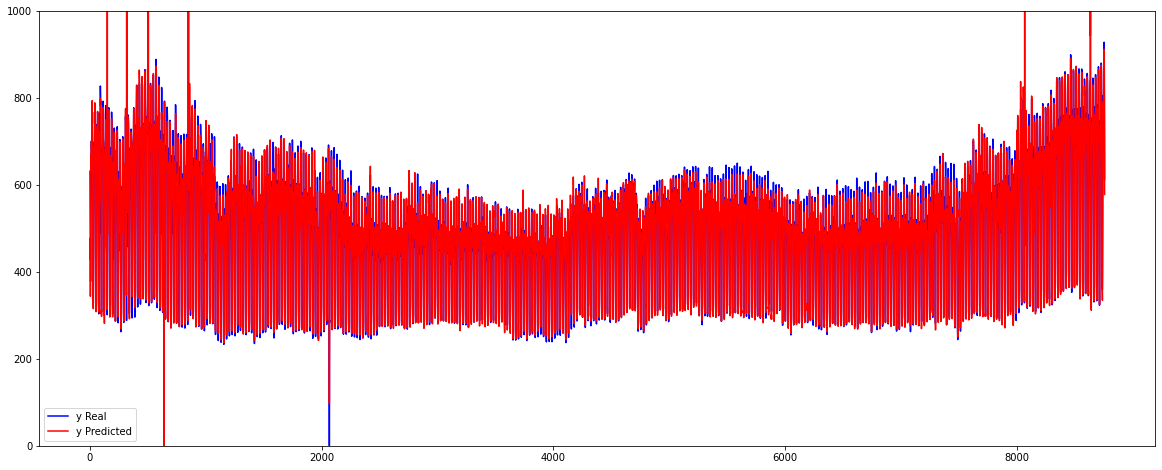

Final R2 Score: 0.8696535631662909


In [ ]:
parameters= {"n_estimators":list(range(10,101,10))}
model = RandomForestRegressor(random_state=0)

grid = GridSearchCV(model, param_grid = parameters,scoring="r2",verbose=3)
grid.fit(X_train,y_train)
print('Grid best parameter (max. R2): ', grid.best_params_)
print('Grid best score (R2): ', grid.best_score_)
print("R2 Score on test:",r2_score(y_test, grid.predict(X_test)))
fig, ax= plt.subplots(figsize=(20,8))
ax= plotRgresion(y_2005,grid.predict(X_2005),ax,True,0,1000)
plt.legend()
plt.show()
print("Final R2 Score:",r2_score(y_2005,grid.predict(X_2005)))

## 02.2 K-Nearet Neighbours

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .....................n_neighbors=3;, score=0.638 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3;, score=0.515 total time=   0.0s
[CV 3/5] END .....................n_neighbors=3;, score=0.722 total time=   0.0s
[CV 4/5] END .....................n_neighbors=3;, score=0.322 total time=   0.0s
[CV 5/5] END .....................n_neighbors=3;, score=0.382 total time=   0.0s
[CV 1/5] END .....................n_neighbors=5;, score=0.639 total time=   0.0s
[CV 2/5] END .....................n_neighbors=5;, score=0.716 total time=   0.0s
[CV 3/5] END .....................n_neighbors=5;, score=0.821 total time=   0.0s
[CV 4/5] END .....................n_neighbors=5;, score=0.362 total time=   0.0s
[CV 5/5] END .....................n_neighbors=5;, score=0.337 total time=   0.0s
[CV 1/5] END .....................n_neighbors=7;, score=0.632 total time=   0.0s
[CV 2/5] END .....................n_neighbors=7;,

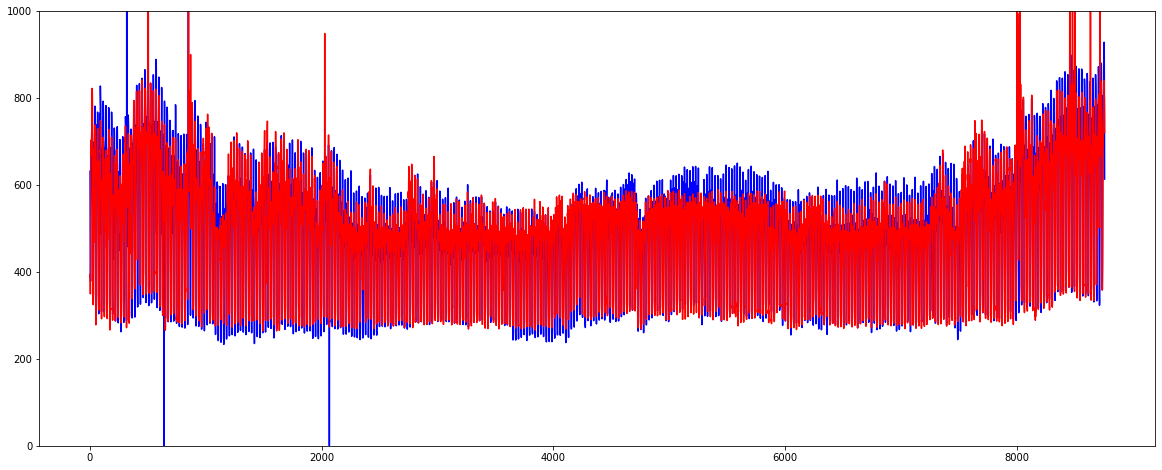

Final R2 Score: 0.6279205764416236


In [ ]:
parametrosKNN= {"n_neighbors":list(range(3,19,2))}
knn = KNeighborsRegressor()

grid = GridSearchCV(knn, param_grid = parametrosKNN,scoring="r2",verbose=3)
grid.fit(X_train,y_train)
print('Grid best parameter (max. R2): ', grid.best_params_)
print('Grid best score (R2): ', grid.best_score_)
print("R2 Score on test:",r2_score(y_test, grid.predict(X_test)))
fig, ax= plt.subplots(figsize=(20,8))
ax= plotRgresion(y_2005,grid.predict(X_2005),ax,True,0,1000)
plt.show()
print("Final R2 Score:",r2_score(y_2005,grid.predict(X_2005)))

## 02.3 Linear Regresion

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END fit_intercept=True, normalize=True;, score=0.413 total time=   0.0s
[CV 2/5] END fit_intercept=True, normalize=True;, score=0.540 total time=   0.0s
[CV 3/5] END fit_intercept=True, normalize=True;, score=0.583 total time=   0.0s
[CV 4/5] END fit_intercept=True, normalize=True;, score=0.224 total time=   0.0s
[CV 5/5] END fit_intercept=True, normalize=True;, score=0.235 total time=   0.0s
[CV 1/5] END fit_intercept=True, normalize=False;, score=0.413 total time=   0.0s
[CV 2/5] END fit_intercept=True, normalize=False;, score=0.540 total time=   0.0s
[CV 3/5] END fit_intercept=True, normalize=False;, score=0.583 total time=   0.0s
[CV 4/5] END fit_intercept=True, normalize=False;, score=0.224 total time=   0.0s
[CV 5/5] END fit_intercept=True, normalize=False;, score=0.235 total time=   0.0s
[CV 1/5] END fit_intercept=False, normalize=True;, score=-0.037 total time=   0.0s
[CV 2/5] END fit_intercept=False, normaliz

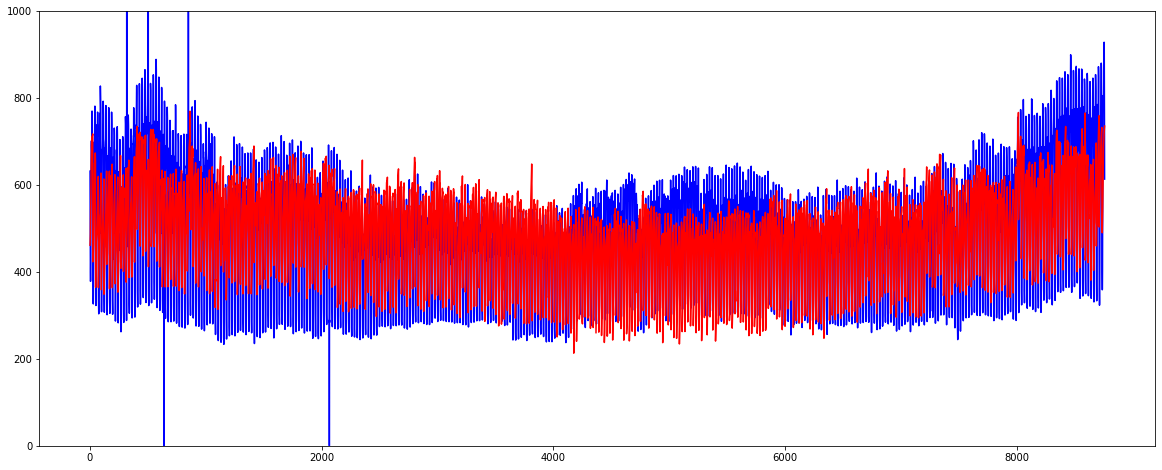

Final R2 Score: 0.37299626339069825


In [ ]:
parametrosLR= {"fit_intercept":[True,False],"normalize":[True,False]}
linear = LinearRegression()

grid = GridSearchCV(linear, param_grid = parametrosLR,scoring="r2",verbose=3)
grid.fit(X_train,y_train)
print('Grid best parameter (max. R2): ', grid.best_params_)
print('Grid best score (R2): ', grid.best_score_)
print("R2 Score on test:",r2_score(y_test, grid.predict(X_test)))
fig, ax= plt.subplots(figsize=(20,8))
ax= plotRgresion(y_2005,grid.predict(X_2005),ax,True,0,1000)
plt.show()
print("Final R2 Score:",r2_score(y_2005,grid.predict(X_2005)))

## 02.4 Neural Networks

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ........hidden_layer_sizes=(1, 1);, score=-5.158 total time=  52.0s
[CV 2/5] END ........hidden_layer_sizes=(1, 1);, score=-0.000 total time=  42.0s
[CV 3/5] END .........hidden_layer_sizes=(1, 1);, score=0.582 total time=   8.7s
[CV 4/5] END .........hidden_layer_sizes=(1, 1);, score=0.221 total time=  12.9s
[CV 5/5] END .........hidden_layer_sizes=(1, 1);, score=0.234 total time=  22.0s
[CV 1/5] END .........hidden_layer_sizes=(1, 2);, score=0.414 total time=   9.4s
[CV 2/5] END .........hidden_layer_sizes=(1, 2);, score=0.540 total time=   9.4s
[CV 3/5] END .........hidden_layer_sizes=(1, 2);, score=0.583 total time=  10.2s
[CV 4/5] END .........hidden_layer_sizes=(1, 2);, score=0.223 total time=   7.2s
[CV 5/5] END .........hidden_layer_sizes=(1, 2);, score=0.235 total time=   9.8s
[CV 1/5] END .........hidden_layer_sizes=(1, 3);, score=0.410 total time=   6.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ........hidden_layer_sizes=(1, 3);, score=-6.794 total time=  51.9s
[CV 3/5] END .........hidden_layer_sizes=(1, 3);, score=0.583 total time=   7.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ........hidden_layer_sizes=(1, 3);, score=-2.699 total time=  58.2s
[CV 5/5] END .........hidden_layer_sizes=(1, 3);, score=0.235 total time=   5.8s
[CV 1/5] END .........hidden_layer_sizes=(1, 4);, score=0.414 total time=  10.6s
[CV 2/5] END .........hidden_layer_sizes=(1, 4);, score=0.540 total time=   7.1s
[CV 3/5] END .........hidden_layer_sizes=(1, 4);, score=0.581 total time=   7.8s
[CV 4/5] END .........hidden_layer_sizes=(1, 4);, score=0.221 total time=   5.8s
[CV 5/5] END .........hidden_layer_sizes=(1, 4);, score=0.235 total time=   9.0s
[CV 1/5] END ........hidden_layer_sizes=(1, 5);, score=-0.000 total time=   5.0s
[CV 2/5] END .........hidden_layer_sizes=(1, 5);, score=0.540 total time=  29.0s
[CV 3/5] END .........hidden_layer_sizes=(1, 5);, score=0.580 total time=   7.9s
[CV 4/5] END .........hidden_layer_sizes=(1, 5);, score=0.221 total time=   5.5s
[CV 5/5] END .........hidden_layer_sizes=(1, 5);, score=0.235 total time=   7.0s
[CV 1/5] END .........hidden

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ........hidden_layer_sizes=(2, 1);, score=-5.159 total time=  56.3s
[CV 2/5] END .........hidden_layer_sizes=(2, 1);, score=0.539 total time=   9.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ........hidden_layer_sizes=(2, 1);, score=-6.517 total time=  55.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ........hidden_layer_sizes=(2, 1);, score=-2.723 total time=  56.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ........hidden_layer_sizes=(2, 1);, score=-2.859 total time=  54.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ........hidden_layer_sizes=(2, 2);, score=-5.149 total time=  56.6s
[CV 2/5] END ........hidden_layer_sizes=(2, 2);, score=-0.000 total time=   8.7s
[CV 3/5] END .........hidden_layer_sizes=(2, 2);, score=0.581 total time=   7.4s
[CV 4/5] END .........hidden_layer_sizes=(2, 2);, score=0.223 total time=  10.8s
[CV 5/5] END .........hidden_layer_sizes=(2, 2);, score=0.234 total time=   6.4s
[CV 1/5] END .........hidden_layer_sizes=(2, 3);, score=0.480 total time=   5.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ........hidden_layer_sizes=(2, 3);, score=-6.754 total time= 1.1min
[CV 3/5] END .........hidden_layer_sizes=(2, 3);, score=0.635 total time=   6.8s
[CV 4/5] END .........hidden_layer_sizes=(2, 3);, score=0.223 total time=  28.4s
[CV 5/5] END .........hidden_layer_sizes=(2, 3);, score=0.237 total time=   7.6s
[CV 1/5] END .........hidden_layer_sizes=(2, 4);, score=0.414 total time=   7.2s
[CV 2/5] END .........hidden_layer_sizes=(2, 4);, score=0.539 total time=  10.0s
[CV 3/5] END .........hidden_layer_sizes=(2, 4);, score=0.676 total time=  10.3s
[CV 4/5] END .........hidden_layer_sizes=(2, 4);, score=0.230 total time=  13.8s
[CV 5/5] END .........hidden_layer_sizes=(2, 4);, score=0.277 total time=   5.1s
[CV 1/5] END .........hidden_layer_sizes=(2, 5);, score=0.537 total time=  13.3s
[CV 2/5] END .........hidden_layer_sizes=(2, 5);, score=0.540 total time=   7.6s
[CV 3/5] END .........hidden_layer_sizes=(2, 5);, score=0.583 total time=   9.0s
[CV 4/5] END .........hidden

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ........hidden_layer_sizes=(2, 6);, score=-6.489 total time= 1.1min
[CV 4/5] END .........hidden_layer_sizes=(2, 6);, score=0.220 total time=  12.7s
[CV 5/5] END .........hidden_layer_sizes=(2, 6);, score=0.237 total time=   6.9s
[CV 1/5] END .........hidden_layer_sizes=(2, 7);, score=0.412 total time=   7.8s
[CV 2/5] END .........hidden_layer_sizes=(2, 7);, score=0.540 total time=   8.6s
[CV 3/5] END .........hidden_layer_sizes=(2, 7);, score=0.584 total time=   7.2s
[CV 4/5] END .........hidden_layer_sizes=(2, 7);, score=0.222 total time=   5.2s
[CV 5/5] END .........hidden_layer_sizes=(2, 7);, score=0.236 total time=   7.0s
[CV 1/5] END .........hidden_layer_sizes=(2, 8);, score=0.414 total time=   6.6s
[CV 2/5] END .........hidden_layer_sizes=(2, 8);, score=0.541 total time=   7.2s
[CV 3/5] END .........hidden_layer_sizes=(2, 8);, score=0.582 total time=   6.5s
[CV 4/5] END .........hidden_layer_sizes=(2, 8);, score=0.255 total time=   6.9s
[CV 5/5] END .........hidden

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ........hidden_layer_sizes=(3, 1);, score=-5.116 total time=  58.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ........hidden_layer_sizes=(3, 1);, score=-6.727 total time=  59.8s
[CV 3/5] END .........hidden_layer_sizes=(3, 1);, score=0.582 total time=   8.5s
[CV 4/5] END .........hidden_layer_sizes=(3, 1);, score=0.223 total time=   9.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ........hidden_layer_sizes=(3, 1);, score=-2.856 total time= 1.0min
[CV 1/5] END .........hidden_layer_sizes=(3, 2);, score=0.413 total time=  12.7s
[CV 2/5] END .........hidden_layer_sizes=(3, 2);, score=0.539 total time=   8.9s
[CV 3/5] END .........hidden_layer_sizes=(3, 2);, score=0.578 total time=   7.3s
[CV 4/5] END .........hidden_layer_sizes=(3, 2);, score=0.244 total time=   9.2s
[CV 5/5] END .........hidden_layer_sizes=(3, 2);, score=0.237 total time=   7.1s
[CV 1/5] END .........hidden_layer_sizes=(3, 3);, score=0.415 total time=   5.5s
[CV 2/5] END .........hidden_layer_sizes=(3, 3);, score=0.695 total time=  12.5s
[CV 3/5] END .........hidden_layer_sizes=(3, 3);, score=0.722 total time=   8.7s
[CV 4/5] END .........hidden_layer_sizes=(3, 3);, score=0.239 total time=   7.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ........hidden_layer_sizes=(3, 3);, score=-2.861 total time= 1.1min
[CV 1/5] END .........hidden_layer_sizes=(3, 4);, score=0.414 total time=   5.3s
[CV 2/5] END .........hidden_layer_sizes=(3, 4);, score=0.540 total time=   5.8s
[CV 3/5] END .........hidden_layer_sizes=(3, 4);, score=0.587 total time=   6.3s
[CV 4/5] END .........hidden_layer_sizes=(3, 4);, score=0.308 total time=   8.6s
[CV 5/5] END .........hidden_layer_sizes=(3, 4);, score=0.236 total time=   7.6s
[CV 1/5] END .........hidden_layer_sizes=(3, 5);, score=0.418 total time=   6.7s
[CV 2/5] END .........hidden_layer_sizes=(3, 5);, score=0.544 total time=   6.6s
[CV 3/5] END .........hidden_layer_sizes=(3, 5);, score=0.588 total time=   4.6s
[CV 4/5] END .........hidden_layer_sizes=(3, 5);, score=0.220 total time=   8.1s
[CV 5/5] END .........hidden_layer_sizes=(3, 5);, score=0.277 total time=   6.7s
[CV 1/5] END .........hidden_layer_sizes=(3, 6);, score=0.415 total time=   5.2s
[CV 2/5] END .........hidden

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ........hidden_layer_sizes=(3, 6);, score=-6.489 total time= 1.2min
[CV 4/5] END .........hidden_layer_sizes=(3, 6);, score=0.343 total time=   7.9s
[CV 5/5] END .........hidden_layer_sizes=(3, 6);, score=0.236 total time=   3.7s
[CV 1/5] END .........hidden_layer_sizes=(3, 7);, score=0.553 total time=  10.7s
[CV 2/5] END .........hidden_layer_sizes=(3, 7);, score=0.591 total time=   7.5s
[CV 3/5] END .........hidden_layer_sizes=(3, 7);, score=0.631 total time=   7.6s
[CV 4/5] END .........hidden_layer_sizes=(3, 7);, score=0.261 total time=   5.6s
[CV 5/5] END .........hidden_layer_sizes=(3, 7);, score=0.357 total time=  10.1s
[CV 1/5] END .........hidden_layer_sizes=(3, 8);, score=0.483 total time=   6.0s
[CV 2/5] END .........hidden_layer_sizes=(3, 8);, score=0.603 total time=   8.2s
[CV 3/5] END .........hidden_layer_sizes=(3, 8);, score=0.770 total time=   7.9s
[CV 4/5] END .........hidden_layer_sizes=(3, 8);, score=0.222 total time=   6.9s
[CV 5/5] END .........hidden

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ........hidden_layer_sizes=(4, 1);, score=-5.131 total time=  54.6s
[CV 2/5] END .........hidden_layer_sizes=(4, 1);, score=0.601 total time=   9.0s
[CV 3/5] END .........hidden_layer_sizes=(4, 1);, score=0.632 total time=  30.9s
[CV 4/5] END .........hidden_layer_sizes=(4, 1);, score=0.221 total time=  11.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ........hidden_layer_sizes=(4, 1);, score=-2.818 total time=  54.6s
[CV 1/5] END .........hidden_layer_sizes=(4, 2);, score=0.414 total time=   6.3s
[CV 2/5] END .........hidden_layer_sizes=(4, 2);, score=0.543 total time=   6.8s
[CV 3/5] END .........hidden_layer_sizes=(4, 2);, score=0.591 total time=   7.7s
[CV 4/5] END .........hidden_layer_sizes=(4, 2);, score=0.222 total time=   8.2s
[CV 5/5] END .........hidden_layer_sizes=(4, 2);, score=0.335 total time=   8.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ........hidden_layer_sizes=(4, 3);, score=-5.169 total time= 1.0min
[CV 2/5] END .........hidden_layer_sizes=(4, 3);, score=0.606 total time=   7.7s
[CV 3/5] END .........hidden_layer_sizes=(4, 3);, score=0.642 total time=   5.3s
[CV 4/5] END .........hidden_layer_sizes=(4, 3);, score=0.239 total time=   5.8s
[CV 5/5] END .........hidden_layer_sizes=(4, 3);, score=0.274 total time=   4.9s
[CV 1/5] END .........hidden_layer_sizes=(4, 4);, score=0.414 total time=   5.1s
[CV 2/5] END .........hidden_layer_sizes=(4, 4);, score=0.538 total time=   4.8s
[CV 3/5] END .........hidden_layer_sizes=(4, 4);, score=0.634 total time=   8.2s
[CV 4/5] END .........hidden_layer_sizes=(4, 4);, score=0.340 total time=   6.5s
[CV 5/5] END .........hidden_layer_sizes=(4, 4);, score=0.237 total time=   4.9s
[CV 1/5] END .........hidden_layer_sizes=(4, 5);, score=0.507 total time=  14.3s
[CV 2/5] END .........hidden_layer_sizes=(4, 5);, score=0.768 total time=  12.7s
[CV 3/5] END .........hidden

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ........hidden_layer_sizes=(7, 1);, score=-2.734 total time=  59.9s
[CV 5/5] END .........hidden_layer_sizes=(7, 1);, score=0.276 total time=   5.9s
[CV 1/5] END .........hidden_layer_sizes=(7, 2);, score=0.476 total time=   6.5s
[CV 2/5] END .........hidden_layer_sizes=(7, 2);, score=0.598 total time=   5.4s
[CV 3/5] END .........hidden_layer_sizes=(7, 2);, score=0.804 total time=  10.0s
[CV 4/5] END .........hidden_layer_sizes=(7, 2);, score=0.242 total time=   5.5s
[CV 5/5] END .........hidden_layer_sizes=(7, 2);, score=0.236 total time=   5.1s
[CV 1/5] END .........hidden_layer_sizes=(7, 3);, score=0.479 total time=  16.2s
[CV 2/5] END .........hidden_layer_sizes=(7, 3);, score=0.603 total time=   6.1s
[CV 3/5] END .........hidden_layer_sizes=(7, 3);, score=0.640 total time=   8.4s
[CV 4/5] END .........hidden_layer_sizes=(7, 3);, score=0.349 total time=  12.6s
[CV 5/5] END .........hidden_layer_sizes=(7, 3);, score=0.275 total time=   5.7s
[CV 1/5] END .........hidden

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ........hidden_layer_sizes=(8, 1);, score=-6.472 total time=  58.1s
[CV 4/5] END .........hidden_layer_sizes=(8, 1);, score=0.225 total time=  13.3s
[CV 5/5] END .........hidden_layer_sizes=(8, 1);, score=0.237 total time=   6.0s
[CV 1/5] END .........hidden_layer_sizes=(8, 2);, score=0.503 total time=   9.8s
[CV 2/5] END .........hidden_layer_sizes=(8, 2);, score=0.586 total time=  26.6s
[CV 3/5] END .........hidden_layer_sizes=(8, 2);, score=0.629 total time=   9.1s
[CV 4/5] END .........hidden_layer_sizes=(8, 2);, score=0.331 total time=  11.9s
[CV 5/5] END .........hidden_layer_sizes=(8, 2);, score=0.276 total time=   5.3s
[CV 1/5] END .........hidden_layer_sizes=(8, 3);, score=0.482 total time=   4.9s
[CV 2/5] END .........hidden_layer_sizes=(8, 3);, score=0.781 total time=   8.2s
[CV 3/5] END .........hidden_layer_sizes=(8, 3);, score=0.802 total time=   9.3s
[CV 4/5] END .........hidden_layer_sizes=(8, 3);, score=0.237 total time=   5.1s
[CV 5/5] END .........hidden

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ........hidden_layer_sizes=(9, 1);, score=-6.754 total time= 1.1min
[CV 3/5] END .........hidden_layer_sizes=(9, 1);, score=0.587 total time=  13.4s
[CV 4/5] END .........hidden_layer_sizes=(9, 1);, score=0.222 total time=   5.7s
[CV 5/5] END .........hidden_layer_sizes=(9, 1);, score=0.276 total time=   6.0s
[CV 1/5] END .........hidden_layer_sizes=(9, 2);, score=0.588 total time=  11.9s
[CV 2/5] END .........hidden_layer_sizes=(9, 2);, score=0.544 total time=  33.1s
[CV 3/5] END .........hidden_layer_sizes=(9, 2);, score=0.627 total time=   6.3s
[CV 4/5] END .........hidden_layer_sizes=(9, 2);, score=0.225 total time=   5.7s
[CV 5/5] END .........hidden_layer_sizes=(9, 2);, score=0.277 total time=   6.5s
[CV 1/5] END .........hidden_layer_sizes=(9, 3);, score=0.416 total time=  31.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ........hidden_layer_sizes=(9, 3);, score=-6.757 total time= 1.3min
[CV 3/5] END .........hidden_layer_sizes=(9, 3);, score=0.646 total time=  19.1s
[CV 4/5] END .........hidden_layer_sizes=(9, 3);, score=0.223 total time=  37.2s
[CV 5/5] END .........hidden_layer_sizes=(9, 3);, score=0.266 total time=   4.7s
[CV 1/5] END .........hidden_layer_sizes=(9, 4);, score=0.411 total time=   5.2s
[CV 2/5] END .........hidden_layer_sizes=(9, 4);, score=0.601 total time=  25.0s
[CV 3/5] END .........hidden_layer_sizes=(9, 4);, score=0.792 total time=   9.0s
[CV 4/5] END .........hidden_layer_sizes=(9, 4);, score=0.333 total time=  14.3s
[CV 5/5] END .........hidden_layer_sizes=(9, 4);, score=0.277 total time=   4.4s
[CV 1/5] END .........hidden_layer_sizes=(9, 5);, score=0.621 total time=  11.8s
[CV 2/5] END .........hidden_layer_sizes=(9, 5);, score=0.545 total time=   5.9s
[CV 3/5] END .........hidden_layer_sizes=(9, 5);, score=0.639 total time=   4.9s
[CV 4/5] END .........hidden

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END .......hidden_layer_sizes=(10, 1);, score=-6.533 total time= 1.2min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END .......hidden_layer_sizes=(10, 1);, score=-2.708 total time= 1.1min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END .......hidden_layer_sizes=(10, 1);, score=-2.824 total time= 1.0min
[CV 1/5] END ........hidden_layer_sizes=(10, 2);, score=0.467 total time=   5.0s
[CV 2/5] END ........hidden_layer_sizes=(10, 2);, score=0.543 total time=   5.2s
[CV 3/5] END ........hidden_layer_sizes=(10, 2);, score=0.631 total time=   6.0s
[CV 4/5] END ........hidden_layer_sizes=(10, 2);, score=0.248 total time=   6.5s
[CV 5/5] END ........hidden_layer_sizes=(10, 2);, score=0.355 total time=  12.6s
[CV 1/5] END ........hidden_layer_sizes=(10, 3);, score=0.600 total time=   9.9s
[CV 2/5] END ........hidden_layer_sizes=(10, 3);, score=0.600 total time=   4.9s
[CV 3/5] END ........hidden_layer_sizes=(10, 3);, score=0.812 total time=  11.1s
[CV 4/5] END ........hidden_layer_sizes=(10, 3);, score=0.246 total time=   8.3s
[CV 5/5] END ........hidden_layer_sizes=(10, 3);, score=0.238 total time=  36.0s
[CV 1/5] END ........hidden_layer_sizes=(10, 4);, score=0.585 total time=  11.2s
[CV 2/5] END ........hidden_

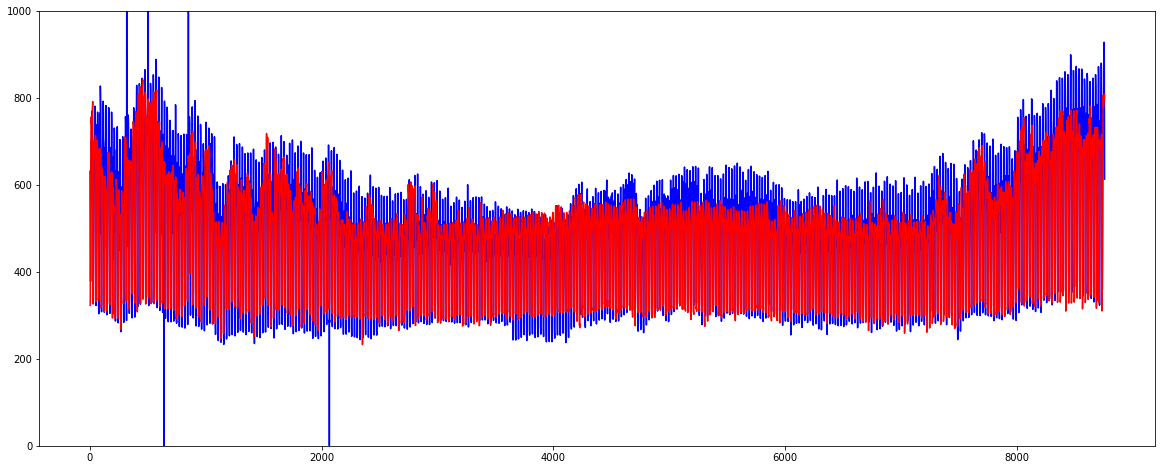

Final R2 Score: 0.5542847245302072


In [ ]:
layers=[]
for i in range(1,11):
  for j in range(1,11):
    layers.append((i,j))
parametrosMLP= {"hidden_layer_sizes":layers}
mlp = MLPRegressor(max_iter=5000)

grid = GridSearchCV(mlp, param_grid = parametrosMLP,scoring="r2",verbose=3)
grid.fit(X_train,y_train)
print('Grid best parameter (max. R2): ', grid.best_params_)
print('Grid best score (R2): ', grid.best_score_)
print("R2 Score on test:",r2_score(y_test, grid.predict(X_test)))
fig, ax= plt.subplots(figsize=(20,8))
ax= plotRgresion(y_2005,grid.predict(X_2005),ax,True,0,1000)
plt.show()
print("Final R2 Score:",r2_score(y_2005,grid.predict(X_2005)))

Based on the models above, we obtained that the best method to predict the energy was a Random Forest with 70 Trees using the following variables:
'temp_per_day_2005','HourOfDay','full_humid_2005'

*   Mean energy per Day
*   Hour of the Day
*   Humidity of the Hour

Hence, we obtained 2 different models to predict energy, each one for a different year



## 02.5 Final Model for 2005

In [ ]:
X_2005= df_energy[['temp_per_day_2005','HourOfDay','full_humid_2005']]
y_2005= df_energy['energy_consumpt_2005']

X_train, X_test, y_train, y_test= train_test_split(X_2005,y_2005,random_state=21)

R2 Score on test: 0.6105817867373805


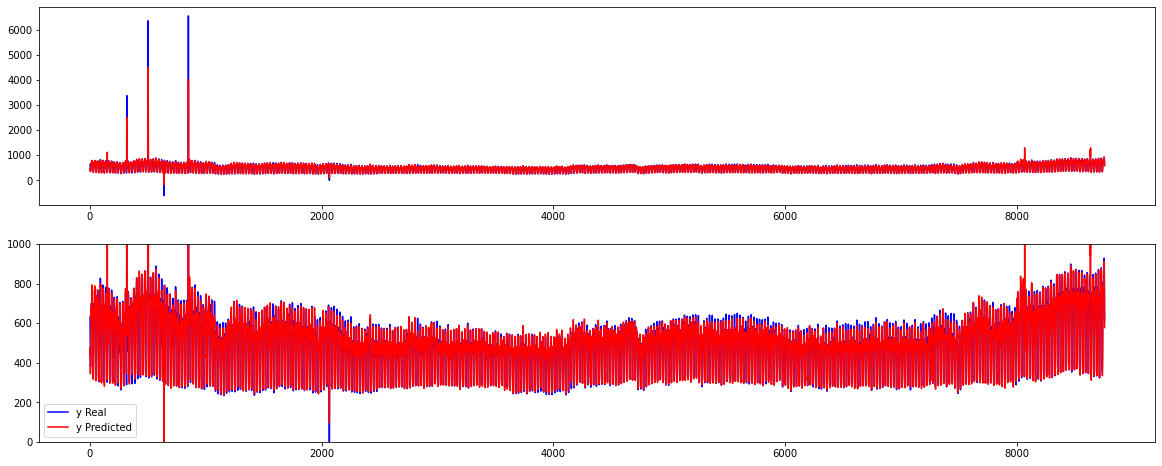

Final R2 Score: 0.8696535631662909


In [ ]:
parameters= {"n_estimators":list(range(10,101,10))}
rf = RandomForestRegressor(random_state=0, n_estimators=70)
rf.fit(X_train,y_train)

print("R2 Score on test:",r2_score(y_test, rf.predict(X_test)))
fig, axs= plt.subplots(2,1,figsize=(20,8))
axs[0]= plotRgresion(y_2005,rf.predict(X_2005),axs[0],False,0,1000)
axs[1]= plotRgresion(y_2005,rf.predict(X_2005),axs[1],True,0,1000)
plt.legend()
plt.show()
print("Final R2 Score:",r2_score(y_2005,rf.predict(X_2005)))

## 02.6 Final Model for 2006

In [ ]:
X_2006= df_energy[['temp_per_day_2006','HourOfDay','full_humid_2006']]
y_2006= df_energy['energy_consumpt_2006']

X_train, X_test, y_train, y_test= train_test_split(X_2006,y_2006,random_state=21)

R2 Score on test: 0.7109454039566507


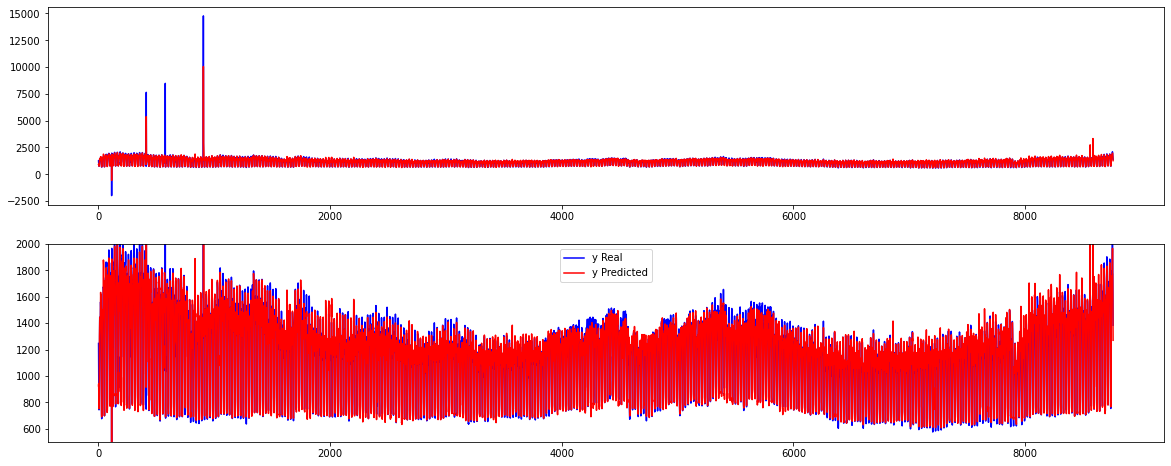

Final R2 Score: 0.8857925371269807


In [ ]:
parameters= {"n_estimators":list(range(10,101,10))}
rf = RandomForestRegressor(random_state=0, n_estimators=70)
rf.fit(X_train,y_train)

print("R2 Score on test:",r2_score(y_test, rf.predict(X_test)))
fig, axs= plt.subplots(2,1,figsize=(20,8))
axs[0]= plotRgresion(y_2006,rf.predict(X_2006),axs[0],False,0,1000)
axs[1]= plotRgresion(y_2006,rf.predict(X_2006),axs[1],True,500,2000)
plt.legend()
plt.show()
print("Final R2 Score:",r2_score(y_2006,rf.predict(X_2006)))

# 03. Time Series Forecast

The previous models can predcit the energy of the hour based on some variables, however, we can see that both years have a similar pattern in the energy, but it has a different scale.

Hence, if we apply a tiem series forecast we might get a better model to predict the energy based on time

In [ ]:
df_energy= pd.read_csv("/content/energy__data-2 (1).csv")
df_energy

,Hour,energy_consumpt_2005,energy_consumpt_2006,full_temp_2005,full_humid_2005,full_temp_2006,full_humid_2006
0,1,631.623161,1246.300847,-0.400000,64.000000,7.600000,82.000000
1,2,534.397104,1062.500558,-0.733333,65.333333,7.733333,78.666667
2,3,453.538785,884.586887,-1.066667,66.666667,7.866667,75.333333
3,4,400.699718,786.564121,-1.400000,68.000000,8.000000,72.000000
4,5,378.171092,742.669614,-1.666667,60.333333,8.333333,69.666667
...,...,...,...,...,...,...,...
8779,8780,950.369306,0.000000,3.333333,64.000000,NaN,NaN
8780,8781,880.138770,0.000000,2.666667,68.000000,NaN,NaN
8781,8782,792.754026,0.000000,2.000000,72.000000,NaN,NaN
8782,8783,740.446668,0.000000,1.333333,76.000000,NaN,NaN


## 03.1 Na & Outliers

We will deal with Na and outliers so that we can get a better representation of the time series

In [ ]:
#We will check for Na and interpolate it to get a close prediction of what that value could be
df_energy.isna().sum()

Hour                     0
energy_consumpt_2005    34
energy_consumpt_2006    42
full_temp_2005           0
full_humid_2005          0
full_temp_2006          24
full_humid_2006         24
dtype: int64

In [ ]:
df_energy["energy_consumpt_2005"].fillna(value=df_energy["energy_consumpt_2005"].interpolate(), inplace=True)
df_energy["energy_consumpt_2006"].fillna(value=df_energy["energy_consumpt_2006"].interpolate(), inplace=True)
df_energy.isna().sum()

Hour                     0
energy_consumpt_2005     0
energy_consumpt_2006     0
full_temp_2005           0
full_humid_2005          0
full_temp_2006          24
full_humid_2006         24
dtype: int64

In [ ]:
df_energy["energy_consumpt_2005"].plot()
df_energy["energy_consumpt_2006"].plot()

In [ ]:
#Eliminate outliers by year since there is a big difference in values each year, 
#The graphs for each year will be affected by this couple big outliers
up_limit06 = df_energy["energy_consumpt_2006"].mean() + 3*df_energy["energy_consumpt_2006"].std()
low_limit06 = df_energy["energy_consumpt_2006"].mean() - 3*df_energy["energy_consumpt_2006"].std()
up_limit05 = df_energy["energy_consumpt_2005"].mean() + 3*df_energy["energy_consumpt_2005"].std()
low_limit05 = df_energy["energy_consumpt_2005"].mean() - 3*df_energy["energy_consumpt_2005"].std()
print(up_limit05,low_limit05)
print(up_limit06,low_limit06)
print(df_energy[(df_energy["energy_consumpt_2006"] < low_limit06) | (df_energy["energy_consumpt_2006"] > up_limit06)].tail())
print(df_energy[(df_energy["energy_consumpt_2005"] < low_limit05) | (df_energy["energy_consumpt_2005"] > up_limit05)].head())
df_energy = df_energy[(df_energy["energy_consumpt_2006"] > low_limit06) & (df_energy["energy_consumpt_2006"] < up_limit06)]
df_energy = df_energy[(df_energy["energy_consumpt_2005"] > low_limit05) & (df_energy["energy_consumpt_2005"] < up_limit05)]


991.0855739940082 -13.475213269908352
2207.6933705625834 84.29042652372891
      Hour  energy_consumpt_2005  energy_consumpt_2006  full_temp_2005  \
8779  8780            950.369306                   0.0        3.333333   
8780  8781            880.138770                   0.0        2.666667   
8781  8782            792.754026                   0.0        2.000000   
8782  8783            740.446668                   0.0        1.333333   
8783  8784            706.176769                   0.0        0.666667   

      full_humid_2005  full_temp_2006  full_humid_2006  
8779             64.0             NaN              NaN  
8780             68.0             NaN              NaN  
8781             72.0             NaN              NaN  
8782             76.0             NaN              NaN  
8783             80.0             NaN              NaN  
      Hour  energy_consumpt_2005  energy_consumpt_2006  full_temp_2005  \
317    318           3378.521357            850.109412        4.

## 03.2 Time series

In [ ]:
#We create a time series by adding 2006 data after 2005 data
df_energy_original = df_energy
df_energy06 = df_energy[["energy_consumpt_2006", "full_temp_2006", "full_humid_2006"]]
df_energy05 = df_energy[["energy_consumpt_2005", "full_temp_2005", "full_humid_2005"]]
df_energy_merged = df_energy05.append(df_energy06, ignore_index = True)
df_energy_merged.fillna(0, inplace=True)
df_energy_merged["Energy_05-06"] = df_energy_merged["energy_consumpt_2005"] + df_energy_merged["energy_consumpt_2006"]
df_energy_merged["Temp_05-06"] = df_energy_merged["full_temp_2005"] + df_energy_merged["full_temp_2006"]
df_energy_merged["Humid_05-06"] = df_energy_merged["full_humid_2005"] + df_energy_merged["full_humid_2006"]
df_energy_merged["Hour"] = df_energy_merged.index + 1
df_energy = df_energy_merged[["Hour","Energy_05-06", "Temp_05-06", "Humid_05-06"]]
df_energy.drop(df_energy.tail(24).index,inplace = True)
df_energy


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Hour,Energy_05-06,Temp_05-06,Humid_05-06
0,1,631.623161,-0.400000,64.000000
1,2,534.397104,-0.733333,65.333333
2,3,453.538785,-1.066667,66.666667
3,4,400.699718,-1.400000,68.000000
4,5,378.171092,-1.666667,60.333333
...,...,...,...,...
17475,17476,1875.387704,6.200000,69.333333
17476,17477,1854.660964,5.000000,74.666667
17477,17478,1754.937960,3.800000,80.000000
17478,17479,1522.868907,3.266667,84.000000


In [ ]:
# We create a time index dividing each value in days, weeks, month and years
df_energy["Year"]=2005
df_energy["Day"]= (((df_energy["Hour"]-1)/24)+1).apply(np.floor)
df_energy["Date"]=(np.asarray(df_energy['Year'], dtype='datetime64[Y]')-1970)+(np.asarray(df_energy['Day'], dtype='timedelta64[D]')-1)
df_energy["Month"]=pd.DatetimeIndex(df_energy['Date']).month
df_energy.set_index("Date", inplace=True)
df_energy = df_energy[["Hour","Energy_05-06", "Temp_05-06", "Humid_05-06"]] 
df_energy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Hour,Energy_05-06,Temp_05-06,Humid_05-06,Year,Day,Week
0,1,631.623161,-0.400000,64.000000,2005,1.0,1.0
1,2,534.397104,-0.733333,65.333333,2005,1.0,1.0
2,3,453.538785,-1.066667,66.666667,2005,1.0,1.0
3,4,400.699718,-1.400000,68.000000,2005,1.0,1.0
4,5,378.171092,-1.666667,60.333333,2005,1.0,1.0
...,...,...,...,...,...,...,...
17475,17476,1875.387704,6.200000,69.333333,2005,729.0,105.0
17476,17477,1854.660964,5.000000,74.666667,2005,729.0,105.0
17477,17478,1754.937960,3.800000,80.000000,2005,729.0,105.0
17478,17479,1522.868907,3.266667,84.000000,2005,729.0,105.0


In [ ]:
# One table for each year
df_energy_05 = df_energy["2005":"2005"]
df_energy_05.rename(columns={"Energy_05-06":"Energy_05","Temp_05-06":"Temp_05","Humid_05-06":"Humid_05"}, inplace=True) 
df_energy_06 = df_energy["2006":"2006"]
df_energy_06.rename(columns={"Energy_05-06":"Energy_06","Temp_05-06":"Temp_06","Humid_05-06":"Humid_06"}, inplace=True)   
df_energy_06

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Hour,Energy_06,Temp_06,Humid_06
Date,,,,
2006-01-01,8761,1227.253515,9.800000,59.000000
2006-01-01,8762,1374.030850,10.200000,56.000000
2006-01-01,8763,1444.229449,11.066667,53.000000
2006-01-01,8764,1443.072200,11.933333,50.000000
2006-01-01,8765,1421.878892,12.800000,47.000000
...,...,...,...,...
2006-12-30,17476,1875.387704,6.200000,69.333333
2006-12-30,17477,1854.660964,5.000000,74.666667
2006-12-30,17478,1754.937960,3.800000,80.000000


In [ ]:
# Avarage the values from hourly to day, week and month
df_energyDay=df_energy.resample("D").mean()
df_energyWeek=df_energy.resample("W").mean()
df_energyMont=df_energy.resample("M").mean()
df_energyWeek

,Hour,Energy_05-06,Temp_05-06,Humid_05-06
Date,,,,
2005-01-02,24.5,597.812417,5.268750,52.229167
2005-01-09,132.5,580.957300,11.107341,76.662698
2005-01-16,300.5,548.721333,10.871230,72.688492
2005-01-23,468.5,622.625542,2.938095,54.722222
2005-01-30,636.5,581.283938,8.793254,68.250000
...,...,...,...,...
2006-12-03,16764.5,1107.905150,9.755952,74.684524
2006-12-10,16932.5,1211.112521,8.797619,70.130952
2006-12-17,17100.5,1247.251819,7.802381,75.386905


## 03.3 Forecast

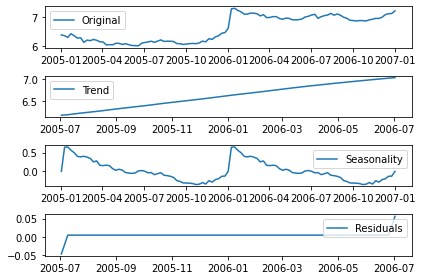

In [ ]:
#We selected per week since is a more accurate representation of the mean but still enough values for a prediction
#We analize our data dividing it by trend, seasonality and residuals
ts_log = np.log(df_energyWeek["Energy_05-06"])
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

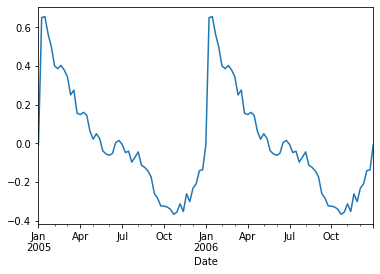

In [ ]:
seasonal.plot()

In [ ]:
#Algorithm to find optimal SARIMAX values while we can asses for every value of q, d, p and seasonality
#This will be a very long task so we can shrink this parameters based on a quick analisis of the previous graph
#Like setting seasonality for 52
#You can shrink the parameters the more quicker you want the code to run
#Or enlarge them the most thourough you want it to be
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from pandas import read_csv
# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error
 
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores
 
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1, 2]
	d_params = [0, 1]
	q_params = [0, 1, 2]
	t_params = ['n','c','t','ct']
	P_params = [0, 1, 2]
	D_params = [0, 1]
	Q_params = [0, 1, 2]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models
 
if __name__ == '__main__':
	# load dataset
	data = df_energyWeek["Energy_05-06"]
	print(data.shape)
	# data split
	n_test = 12
	# model configs
	cfg_list = sarima_configs(seasonal=[13,52])
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 3 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

(105,)
 > Model[[(0, 0, 0), (0, 0, 0, 52), 'n']] 1116.328
 > Model[[(0, 0, 0), (0, 0, 0, 13), 'n']] 1116.328
 > Model[[(0, 0, 0), (0, 0, 1, 13), 'n']] 494.988
 > Model[[(0, 0, 0), (0, 1, 0, 13), 'n']] 199.506
 > Model[[(0, 0, 0), (0, 1, 0, 52), 'n']] 569.083
 > Model[[(0, 0, 0), (0, 1, 1, 13), 'n']] 176.467
 > Model[[(0, 0, 0), (0, 0, 2, 13), 'n']] 12553.307
 > Model[[(0, 0, 0), (1, 0, 0, 13), 'n']] 209.060
 > Model[[(0, 0, 0), (1, 0, 0, 52), 'n']] 188.948
 > Model[[(0, 0, 0), (1, 0, 1, 13), 'n']] 294.836
 > Model[[(0, 0, 0), (1, 1, 0, 13), 'n']] 167.702
 > Model[[(0, 0, 0), (1, 0, 2, 13), 'n']] 697652242.139
 > Model[[(0, 0, 0), (1, 1, 1, 13), 'n']] 165.412
 > Model[[(0, 0, 0), (2, 0, 0, 13), 'n']] 213.899
 > Model[[(0, 0, 0), (2, 0, 1, 13), 'n']] 327.606
 > Model[[(0, 0, 0), (2, 1, 0, 13), 'n']] 158.717
 > Model[[(0, 0, 0), (2, 0, 2, 13), 'n']] 309690394.119
 > Model[[(0, 0, 0), (2, 1, 1, 13), 'n']] 178.670
 > Model[[(0, 0, 0), (0, 0, 0, 13), 'c']] 337.229
 > Model[[(0, 0, 0), (0, 0,

KeyboardInterrupt: ignored

In [ ]:
# SARIMA forecast
# fit model
model = SARIMAX(df_energyWeek["Energy_05-06"], order=(0, 1, 0), seasonal_order=(0, 1, 0, 52))
model_fit = model.fit(disp=False)
model_fit.aic

646.7513135401384

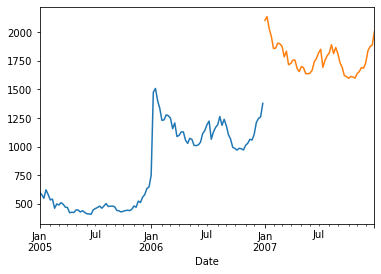

In [ ]:
mf = model_fit.get_forecast(steps=52)
model_forecast = mf.predicted_mean
df_energyWeek["Energy_05-06"].plot()
model_forecast.plot()

In [ ]:
model_forecast

2007-01-07    2104.619289
2007-01-14    2137.176809
2007-01-21    2030.074824
2007-01-28    1963.327585
2007-02-04    1858.010737
2007-02-11    1862.040388
2007-02-18    1905.868554
2007-02-25    1898.763338
2007-03-04    1876.732437
2007-03-11    1785.250854
2007-03-18    1835.575928
2007-03-25    1716.913667
2007-04-01    1726.827026
2007-04-08    1756.786790
2007-04-15    1757.156198
2007-04-22    1684.739601
2007-04-29    1656.645021
2007-05-06    1701.374196
2007-05-13    1690.732066
2007-05-20    1639.102263
2007-05-27    1637.089553
2007-06-03    1643.556327
2007-06-10    1668.233854
2007-06-17    1742.780041
2007-06-24    1769.984096
2007-07-01    1820.432125
2007-07-08    1851.751259
2007-07-15    1693.089736
2007-07-22    1755.423379
2007-07-29    1795.967351
2007-08-05    1819.964328
2007-08-12    1891.786792
2007-08-19    1814.582797
2007-08-26    1867.287032
2007-09-02    1812.169791
2007-09-09    1733.542704
2007-09-16    1693.867007
2007-09-23    1621.839741
2007-09-30  